# Projeto WPT - Grupo 2
Arthur Tamm, Caio Bôa, Gabriel Hermida e Pedro Civita

## Importando Bibliotecas

In [256]:
import numpy as np
from capacitor import Capacitor
from indutor import Indutor
import cmath
from numpy import sqrt, pi, linalg
import matplotlib.pyplot as plt

# Etapa 1

In [257]:
def freqResonancia(l, c):
    return 1/(2*pi*sqrt(l*c))

def CalcularTransformadorProjeto(v1, rc, r, l, k, c, f):
    w = 2*pi*f

    xl = w*l*1j
    xc = 1/(w*c*1j)
    m = k*l
    xm = m*w*1j
    
    Z=np.array([[r+xl+xc, -xm],[-xm, xl+r+1/(1/rc+1/xc)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)

    Zeq = 1/(1/rc+1/xc)
    V2 = I[1]*Zeq

    return I[0],I[1], V2

def CalcularTransformadorProjeto2(v1, rc, r1, r2, l1, l2, k, c, f):
    w = 2*pi*f

    xl1 = w*l1*1j
    xl2 = w*l2*1j
    xc = 1/(w*c*1j)
    m = k*sqrt(l1*l2)
    xm = m*w*1j
    
    Z=np.array([[r1+xl1+xc, -xm],[-xm, xl2+r2+1/(1/rc+1/xc)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)

    Zeq = 1/(1/rc+1/xc)
    V2 = I[1]*Zeq

    return I[0],I[1], V2

def real(zeq):
    return abs(zeq)*np.cos(cmath.phase(zeq))

def capacitorPelaFreqRes(freq, indutancia):
    return 1/(4*pi**2*freq**2*indutancia)

def inducaoPelaFreqRes(freq, capacitancia):
    return 1/(4*pi**2*freq**2*capacitancia)

In [258]:
l  = 0.01
c = 0.47e-6

freqRes = freqResonancia(l, c)
print("Frequencia de ressonancia: ", freqRes)

v1 = 10

rc = 100
r = 1

k = 0.3
m = k*l

frequencies = np.arange(1000, 100000, 10)

values = {"i1": [], "i2": [], "v2": []}

Frequencia de ressonancia:  2321.5134420947206


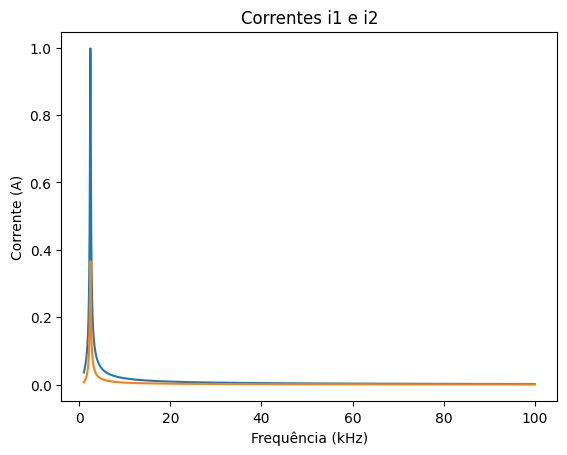

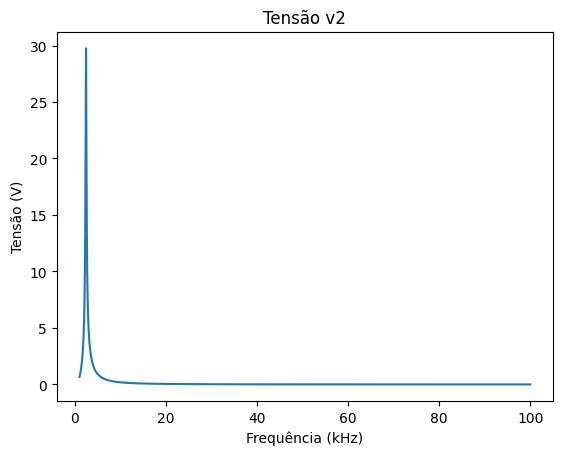

In [259]:
for f in frequencies:
    i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
    values["i1"].append(abs(i1))
    values["i2"].append(abs(i2))
    values["v2"].append(abs(v2))
    
plt.plot(frequencies/1e3, values["i1"])
plt.plot(frequencies/1e3, values["i2"])

plt.title("Correntes i1 e i2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(frequencies/1e3, values["v2"])
plt.title("Tensão v2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.show()



In [260]:
# Descobrindo o valor de frequência que causa correntes máximas
maximo = 0
for i in range(len(values['i1'])):
    if values['i1'][i] >= maximo:
        maximo = values['i1'][i]
        freq_max = frequencies[i]
freq_max

2440

4)

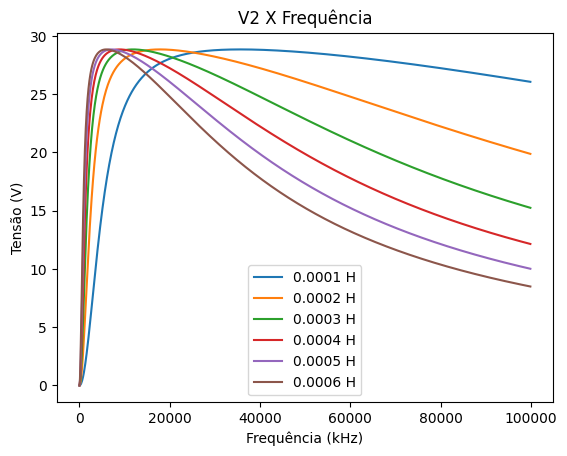

In [261]:
l_list = [100e-6, 200e-6, 300e-6, 400e-6, 500e-6, 600e-6]
# l2_list = [0.1, 0.5, 1, 5, 10, 50]
freqs = np.arange(1, 100e3, 100)
k = 0.3
for l in l_list:
    v2_list = []
    m = k*l
    for f in freqs:
        c = capacitorPelaFreqRes(f, l)
        i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
        v2_list.append(abs(v2))
    plt.plot(freqs, v2_list, label=f"{l} H")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.title('V2 X Frequência')
plt.legend()
plt.show()



Frequência de ressonância 71001.0Hz para indutância 2.5380524473590115e-05H e capacitância 1e-07F

Indutor de 0.00005025 H e capacitor de 1e-07 F

Frequência de ressonância 47401.0Hz para indutância 1.692034964906008e-05H e capacitância 1.5e-07F

Indutor de 0.00007516 H e capacitor de 1.5e-07 F

Frequência de ressonância 7101.0Hz para indutância 2.538052447359012e-06H e capacitância 1e-06F

Indutor de 0.00050234 H e capacitor de 1e-06 F

Frequência de ressonância 1501.0Hz para indutância 5.400111590125557e-07H e capacitância 4.7e-06F

Indutor de 0.00239211 H e capacitor de 4.7e-06 F

Frequência de ressonância 15101.0Hz para indutância 5.400111590125556e-06H e capacitância 4.7e-07F

Indutor de 0.00023634 H e capacitor de 4.7e-07 F



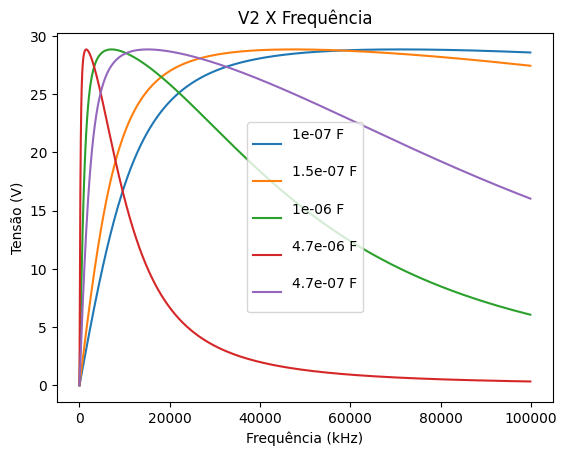

In [262]:
c_list = [0.1e-6, 150e-9, 1e-6, 4.7e-6, 0.47e-6]
# l2_list = [0.1, 0.5, 1, 5, 10, 50]
freqs = np.arange(1, 100e3, 100)
k = 0.3
for c in c_list:
    v2_list = []
    m = k*l
    l_list = []
    for f in freqs:
        l = inducaoPelaFreqRes(f, c)
        l_list.append(l)
        i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
        v2_list.append(abs(v2))
    l_res = l_list[v2_list.index(max(v2_list))]
    print(f"Frequência de ressonância {freqResonancia(l_res, c):.1f}Hz para indutância {l}H e capacitância {c}F\n")

    print(f'Indutor de {l_res:.8f} H e capacitor de {c} F\n')
    plt.plot(freqs, v2_list, label=f"{c} F\n")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.title('V2 X Frequência')
plt.legend()
plt.show()

5.

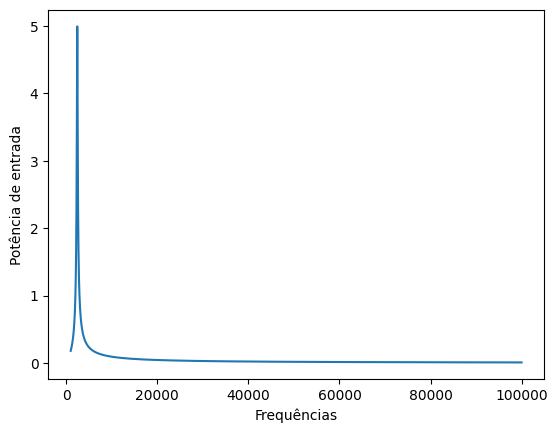

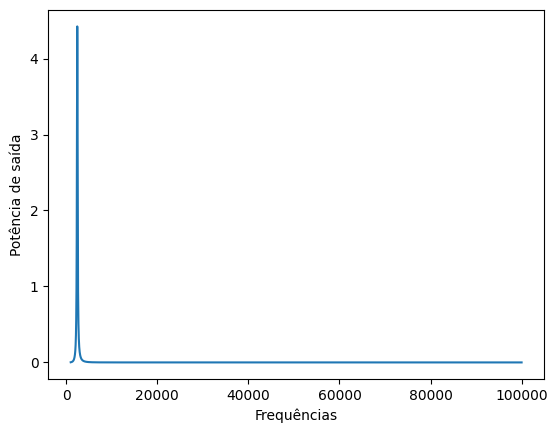

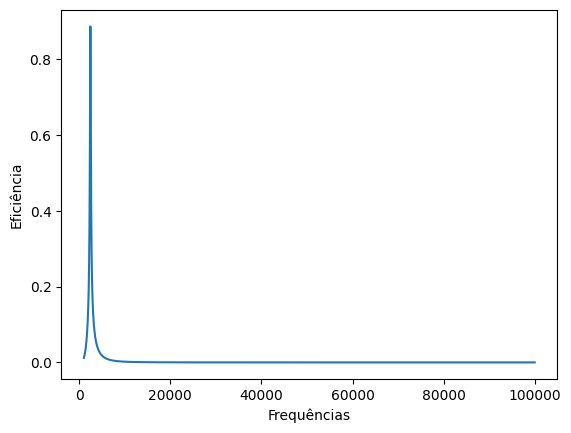

In [263]:
pe  = v1*np.array(values['i1']).conjugate()/2

ic = np.array(values['v2']) / rc
ps = np.array(values['v2'])*ic.conjugate()/2

plt.plot(frequencies, pe.real)
plt.xlabel('Frequências')
plt.ylabel('Potência de entrada')
plt.show()

plt.plot(frequencies, ps.real)
plt.xlabel('Frequências')
plt.ylabel('Potência de saída')
plt.show()

plt.plot(frequencies, ps.real/pe.real)
plt.xlabel('Frequências')
plt.ylabel('Eficiência')
plt.show()


6.

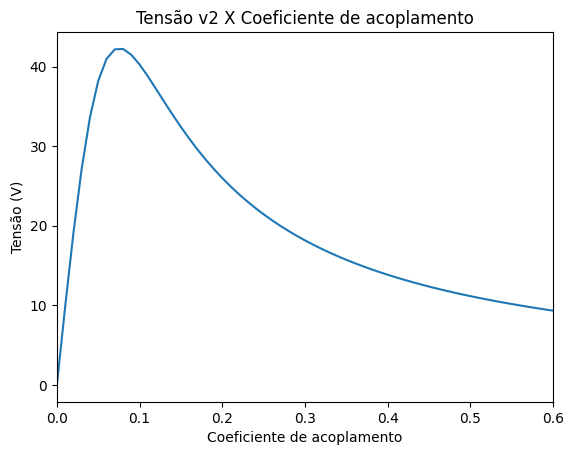

In [264]:
l  = 0.01
c = 0.47e-6

fr = freqResonancia(l, c)

k_list = np.arange(0, 1, 0.01)
v2_list = []

for k in k_list:
    _,_, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, fr)
    v2_list.append(abs(v2))

plt.plot(k_list, v2_list)
plt.xlim(0, 0.6)
plt.title("Tensão v2 X Coeficiente de acoplamento")
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tensão (V)")
plt.show()



### Refazendo etapa 1 para r1 e r2 diferentes e l1 e l2 diferentes

In [265]:
c = 0.47e-6

v1 = 10

rc = 100
r = 1

k = 0.1
m = k*l

frequencies = np.arange(1000, 100000, 10)

values = {"i1": [], "i2": [], "v2": []}

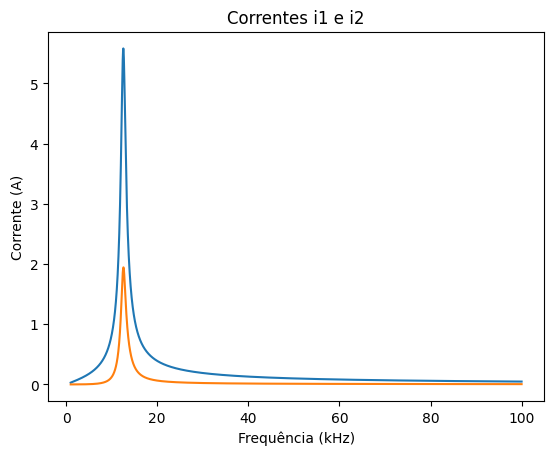

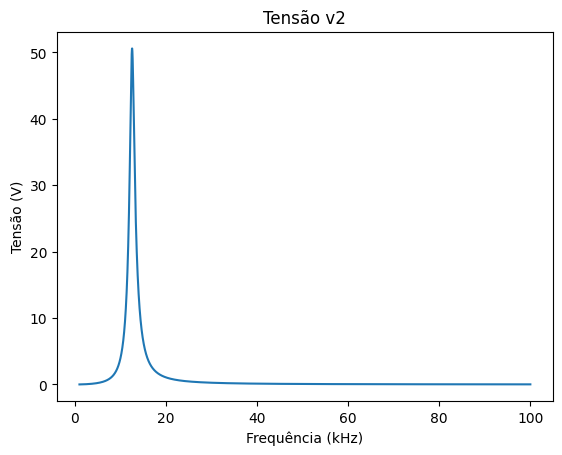

In [266]:
l1 = 344e-6
l2 = 338e-6
r1 = 0.874
r2 = 0.793
for f in frequencies:
    i1, i2, v2 = CalcularTransformadorProjeto2(v1, rc, r1, r2, l1,l2, k, c, f)
    values["i1"].append(abs(i1))
    values["i2"].append(abs(i2))
    values["v2"].append(abs(v2))
    
plt.plot(frequencies/1e3, values["i1"])
plt.plot(frequencies/1e3, values["i2"])

plt.title("Correntes i1 e i2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(frequencies/1e3, values["v2"])
plt.title("Tensão v2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.show()

In [267]:
# Descobrindo o valor de frequência que causa correntes máximas
freqres = frequencies[values['i1'].index(max(values['i1']))]

print(f"Frequência de ressonância de {freqres}Hz")

Frequência de ressonância de 12550Hz


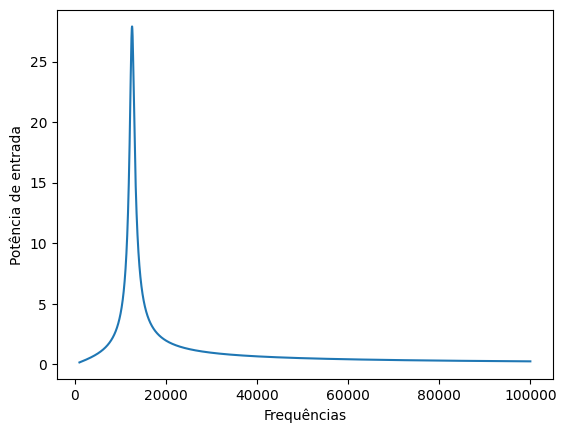

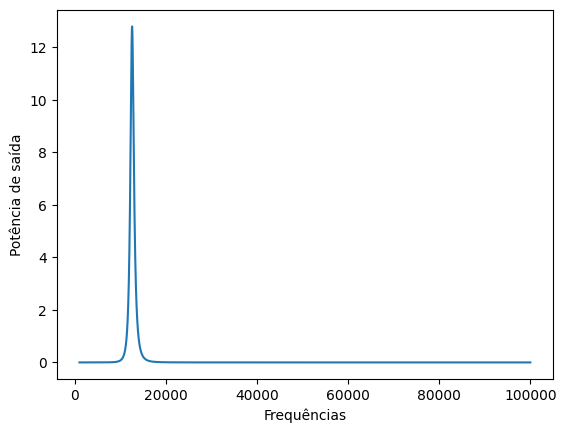

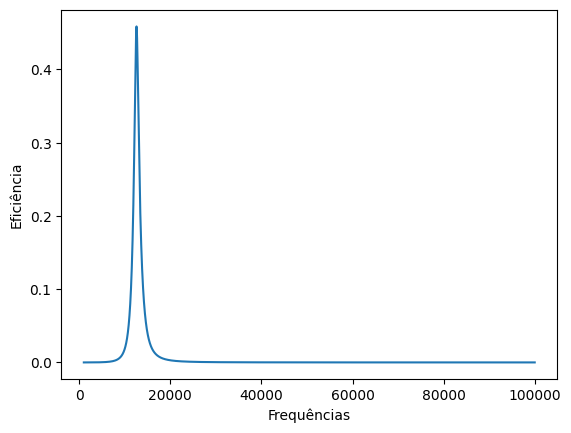

In [268]:
pe  = v1*np.array(values['i1']).conjugate()/2

ic = np.array(values['v2']) / rc
ps = np.array(values['v2'])*ic.conjugate()/2

plt.plot(frequencies, pe.real)
plt.xlabel('Frequências')
plt.ylabel('Potência de entrada')
plt.show()

plt.plot(frequencies, ps.real)
plt.xlabel('Frequências')
plt.ylabel('Potência de saída')
plt.show()

plt.plot(frequencies, ps.real/pe.real)
plt.xlabel('Frequências')
plt.ylabel('Eficiência')
plt.show()


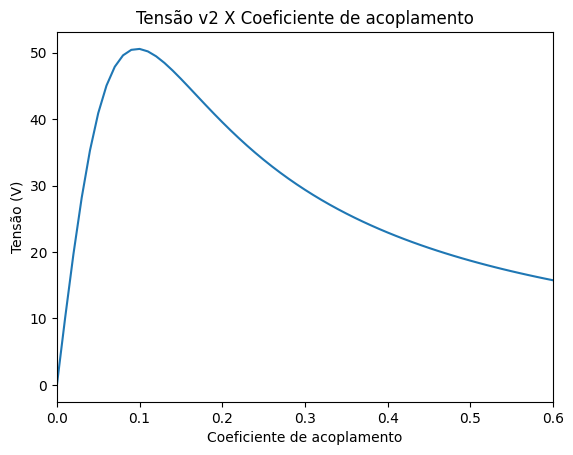

In [269]:
k_list = np.arange(0, 1, 0.01)
v2_list = []

for k in k_list:
    _,_, v2 = CalcularTransformadorProjeto2(v1, rc, r1, r2, l1,l2, k, c, freqres)
    v2_list.append(abs(v2))

plt.plot(k_list, v2_list)
plt.xlim(0, 0.6)
plt.title("Tensão v2 X Coeficiente de acoplamento")
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tensão (V)")
plt.show()
